## Production Model and Insights

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
from housing_functions import *
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier


%matplotlib inline

In [42]:
model = Pipeline(memory=None,
         steps=[('pt',
                 PowerTransformer(copy=True, method='yeo-johnson',
                                  standardize=True)),
                ('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ls',
                 LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001,
                         fit_intercept=True, max_iter=1000, n_alphas=1,
                         n_jobs=None, normalize=False, positive=False,
                         precompute='auto', random_state=42, selection='cyclic',
                         tol=0.0001, verbose=False))],
         verbose=False)
lasso = LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001,
                         fit_intercept=True, max_iter=1000, n_alphas=1,
                         n_jobs=None, normalize=False, positive=False,
                         precompute='auto', random_state=42, selection='cyclic',
                         tol=0.0001, verbose=False)
lasso.fit(X_train,y_train)
# import data
train=pd.read_csv('../datasets/df_dummies_clean.csv')
test=pd.read_csv('../datasets/test_clean.csv')

/Users/allanshomefolder/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [43]:
features_7 = train.drop(['ms_subclass','saleprice'], axis=1).columns
y=train['saleprice']
X=train[features_7]
# Test Train split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model.fit(X_train, y_train)
preds = model.predict(X_test)
y = y_test
resids = (y - preds)

/Users/allanshomefolder/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2863: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Users/allanshomefolder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/allanshomefolder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
/Users/allanshomefolder/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


### Examine Residual Distrobution

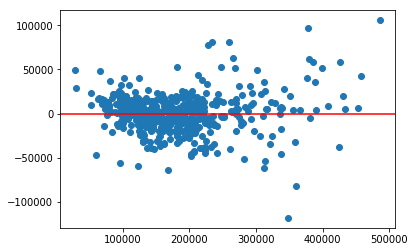

In [44]:
plt.scatter(preds, resids)
plt.axhline(0, color='red');

#### The residuals appear to be homoskedastic and evenly distributed.
- Although they are more dispersed as price increases.

In [45]:
print(f' The MAE for the model is {metrics.mean_absolute_error(y, preds)}')
print(f' The SSE for the model is {sum(resids**2)}')
print(f' The MSE for the model is {metrics.mean_squared_error(y, preds)}')
print(f' The RMSE for the model is {np.sqrt(metrics.mean_squared_error(y, preds))}')
print(f' The R2 for the model is {metrics.r2_score(y, preds)}')
print(f' The MSLE for the model is {metrics.mean_squared_log_error(y, preds)}')


 The MAE for the model is 15900.939495933973
 The SSE for the model is 256159760390.9499
 The MSE for the model is 499336764.89463896
 The RMSE for the model is 22345.844465909962
 The R2 for the model is 0.9210174443985094
 The MSLE for the model is 0.02417851836282846


## Reccomendations

According to this model, the 5 best features for higher price of a home are:
1. Ground Living Area
2. Overall Quality
3. Year Built
4. Overall Condition
5. Total Basement Square Feet

This tells us that the best thing a homeowner can do to increase the value of their house is add on to their house, increasing their square footage.  Year of remodel or addition also had an large impact on the price, coming in at the 8th on the list of positive features.

The neighborhood with the highest priced houses was Northridge Heights, followed closely by Crawford, Stone Brook, and Northridge Heights.  

The top 5 features that have a negative impact on price are:
1. Home functionality - salvage only
2. Ms_zoning - Commercial
3. Kitchen quality - good
4. Gravity heating
5. Kitchen quality - Typical / Average

This tells us that houses with average and good kitchens are seen as less valuable than houses that have newly rennovated kitchens.  Many homebuyers see ronvating a kitchen as a way to improve the resale value of their house, so this makes sense that a full kitchen renovation for a poor quality kitchen that could actually be found appealing to home buyers over an average kitchen that may only need an upgrade.

While gravity furnaces can work nearly forever and have very few mechanical problems, they are incredibly expensive to operate and take up a lot of space. Due to the sheer volume of ducts needed to distribute air throughout your home and the cost of heating enough air to ensure it rises properly, you’re dealing with a heating efficiency of 50% or lower.*

Living in a commercial zone is unapealing in Ames, most likely because there are plenty of neighborhoods farther from commercial zones and assumed polution as well as restrictions on what you can do with your home.**

I feel confident that this model would work well in other towns to a certain extent given a similar dataset.  Some elements that would not be taken into account by this model are urban communities that have different values for homebuyers.  

A datapoint that would improve the model would be school districts an quality metrics related to them.  Some of that information is baked into the neighborhood metric given in this dataset, but it would be helpful to see the effect that schools have independent from neighborhoods.

*https://www.carneyphc.com/blog/heating/what-is-a-gravity-furnace/
** https://www.cityofames.org/home/showdocument?id=662


<script id="ers_chart_widget"
    src="https://www.ers.usda.gov/scripts/widget_charts_of_note.js?key=9cezBjDkRoGuSQKGwWwlSaYiCHn1K8G2TbP2KFru&desc=yes&cId=80708"
    type="text/javascript">
</script> 
<div id="ers_widget_container"> </div>